# **Nama : Renaldi Panji Wibowo**

## **Projek Predictive Analysis - House Rent Prediction**

### **Sumber Dataset : https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset**



---



# **Data Collection**

## **Mengimport ibrary-library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Mengimport Dataset**

In [2]:
df_rent = pd.read_csv("House_Rent_Dataset.csv")
df_rent.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2295,2022-07-04,2,22000,1200,3 out of 5,Carpet Area,Mahadevapura,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Agent
3469,2022-06-10,1,3500,500,1 out of 2,Super Area,Thirunagar,Chennai,Semi-Furnished,Bachelors/Family,1,Contact Owner
476,2022-04-27,2,6000,800,1 out of 2,Super Area,"Chandannagar, Hooghly-Chinsurah",Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2396,2022-06-04,2,12000,400,2 out of 4,Carpet Area,kst chattarpur Apartments,Delhi,Unfurnished,Bachelors,1,Contact Agent
2370,2022-06-02,2,16000,680,1 out of 10,Carpet Area,Devanahalli,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner


# **Data Understanding & Remove Outlier**

## **Mengecek Jumlah Data dan Fitur**

In [3]:
df_rent.shape

(4746, 12)

## **Mengecek Semua Fitur Dataset**

In [6]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## **Menghapus Fitur yang tidak diperlukan**

In [7]:
# Fitur Point of Contract dan Posted On akan dihapus karena tidak mempengaruhi harga sewa rumah
df_rent = df_rent.drop(['Posted On', 'Point of Contact'], axis = 'columns')

## **Univariate Analysis**

### **Fitur Area Type**

In [9]:
df_rent.groupby('Area Type')['Area Type'].agg('count')

Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [10]:
# Fitur Area Type hanya terdapat 2 sample Built Area sehingga 2 sample tersebut akan dihapus
df_rent.drop(df_rent.index[df_rent['Area Type'] == 'Built Area'], inplace = True)

In [13]:
df_rent.groupby('Area Type')['Area Type'].agg('count')

Area Type
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

### **Fitur City**

In [14]:
df_rent.groupby('City')['City'].agg('count')

City
Bangalore    886
Chennai      890
Delhi        605
Hyderabad    867
Kolkata      524
Mumbai       972
Name: City, dtype: int64

### **Fitur FUrnisihing Status**

In [15]:
df_rent.groupby('Furnishing Status')['Furnishing Status'].agg('count')

Furnishing Status
Furnished          679
Semi-Furnished    2251
Unfurnished       1814
Name: Furnishing Status, dtype: int64

### **Fitur Tenant Preferred**

In [16]:
df_rent.groupby('Tenant Preferred')['Tenant Preferred'].agg('count')

Tenant Preferred
Bachelors            830
Bachelors/Family    3442
Family               472
Name: Tenant Preferred, dtype: int64

### **Fitur Floor**

In [17]:
df_rent.groupby('Floor')['Floor'].agg('count')

Floor
1                             2
1 out of 1                  134
1 out of 10                   4
1 out of 11                   1
1 out of 12                   2
                           ... 
Upper Basement out of 4       3
Upper Basement out of 40      1
Upper Basement out of 5       1
Upper Basement out of 7       2
Upper Basement out of 9       2
Name: Floor, Length: 480, dtype: int64

### **Fitur Area Locality**

In [18]:
df_rent.groupby('Area Locality')['Area Locality'].agg('count')

Area Locality
 Beeramguda, Ramachandra Puram, NH 9     1
 in Boduppal, NH 2 2                     1
 in Erragadda, NH 9                      1
 in Miyapur, NH 9                        1
117 Residency, Chembur East              1
                                        ..
vanamali chs ghatla, Ghatla              1
venkatapuram                             1
venkatesa perumal nagar                  1
villvam towers tnhb colony               1
whitefield                              12
Name: Area Locality, Length: 2234, dtype: int64

### **Menghapus Fitur Floor dan Area Locality**

In [19]:
# Fitur Floor dan Area Locality memiliki banyak sekali nilai unique sehingga akan di drop
df_rent = df_rent.drop(['Floor', 'Area Locality'], axis = 'columns')

### **Analisis Sebaran Data Pada Fitur Numerik**

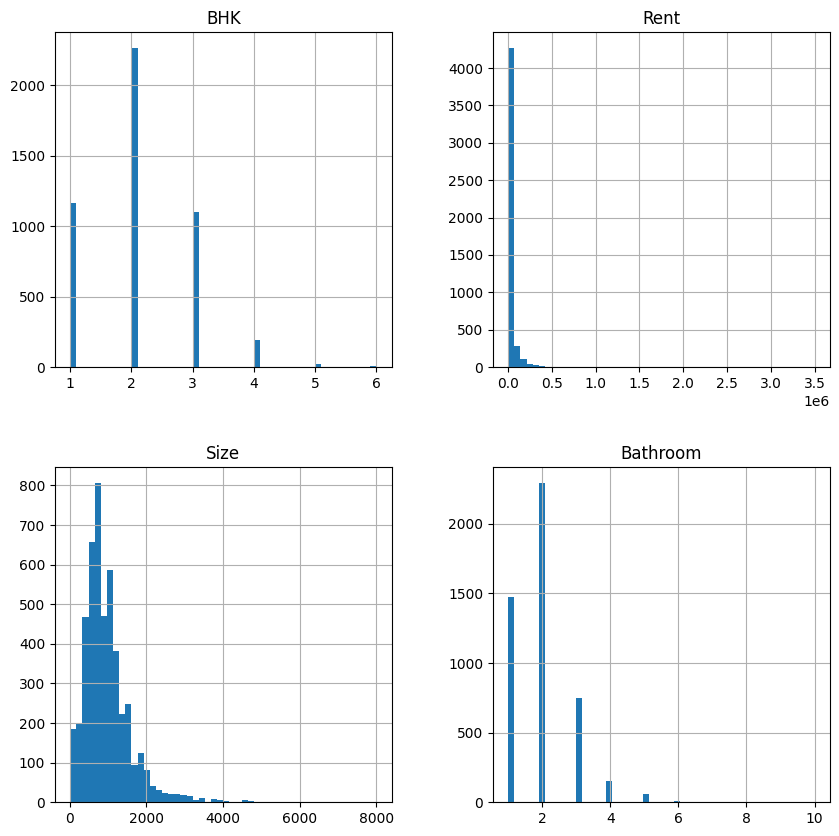

In [20]:
df_rent.hist(bins=50, figsize=(10,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

## **Multivariate Analysis**

### **Menambah Fitur Baru Price per sqft**

In [22]:
# Menambahkan fitur baru price per sqft
df_rent['Price_per_sqft'] = df_rent['Rent']*1000/df_rent['Size']

In [23]:
df_rent.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


### **Deteksi Outlier pada fitur BHK**

In [24]:
# Mendeteksi size per BHK outlier
# 100 sqft untuk 1 BHK itu tidak biasa sehingga anggap saja batasan tresholdnya 300 sqft/bhk

df_rent[(df_rent.Size/df_rent.BHK) < 300].head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,20000.000000
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,26000.000000
21,2,9000,400,Carpet Area,Kolkata,Unfurnished,Bachelors,2,22500.000000
32,2,6000,550,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,10909.090909
33,2,5000,500,Carpet Area,Kolkata,Unfurnished,Bachelors/Family,2,10000.000000


In [25]:
df_rent.shape

(4744, 9)

### **Menghapus Outlier pada BHK**

In [26]:
# Menghapus size per BHK outlier
df1_rent = df_rent[~(df_rent.Size/df_rent.BHK < 300)]
df1_rent.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [27]:
df1_rent.shape

(4196, 9)

### **Mendeteksi Outlier pada fitur price per sqft**

In [28]:
# Mendeteksi price per sqft outlier
df1_rent.Price_per_sqft.describe().apply(lambda x: format(x, 'f'))

count       4196.000000
mean       32827.385605
std        41300.048982
min          571.428571
25%        13000.000000
50%        18511.595708
75%        34896.788991
max      1400000.000000
Name: Price_per_sqft, dtype: object

In [29]:
# Menghapus price per sqft outlier dengan mean dan one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2_rent = remove_pps_outliers(df1_rent)
df2_rent.shape

(3699, 9)

### **Mengatasi Outlier pada Bathroom**

In [30]:
# Mendeteksi bathroom outlier
# 2 BHK dengan 4 kamar mandi itu tidak biasa jadi anggap saja batasnya kamar mandi tidak boleh melebihi jumlah BHK + 2

df2_rent[df2_rent.Bathroom > df2_rent.BHK + 2]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
860,3,20000,1700,Carpet Area,Chennai,Furnished,Bachelors/Family,6,11764.705882
1904,4,150000,4000,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,37500.000000
3328,1,40000,680,Super Area,Mumbai,Furnished,Bachelors/Family,4,58823.529412


In [31]:
# Menghapus bathroom outlier
df2_rent = df2_rent[~(df2_rent.Bathroom > df2_rent.BHK + 2)]
df2_rent.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,3,70000,3354,Carpet Area,Bangalore,Furnished,Bachelors/Family,3,20870.602266
1,2,10500,800,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13125.000000
2,2,13000,1000,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13000.000000
3,2,17000,1040,Super Area,Bangalore,Furnished,Bachelors/Family,2,16346.153846
4,3,21000,1403,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,3,14967.925873


In [32]:
df2_rent.shape

(3696, 9)

### **Menghilangkan fitur price per sqft**

In [33]:
# Menghilangkan fitur price per sqft karena sudah tidak terpakai
df3_rent = df2_rent.drop(['Price_per_sqft'], axis = 'columns')

### **Menganalisis Korelasi Fitur Numerik**

<ipython-input-34-08f6c246ad97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3_rent.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

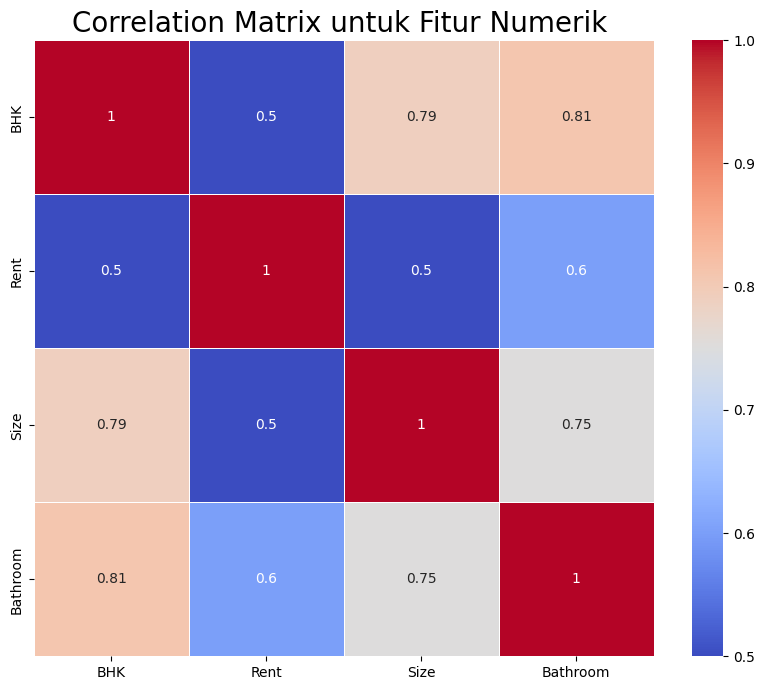

In [34]:
# Melihat kolerasi antara fitur numerik dengan fitur target (harga)
plt.figure(figsize=(10, 8))
correlation_matrix = df3_rent.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

### **Analisis Fitur Kategorikal**

**Fitur Area Type**

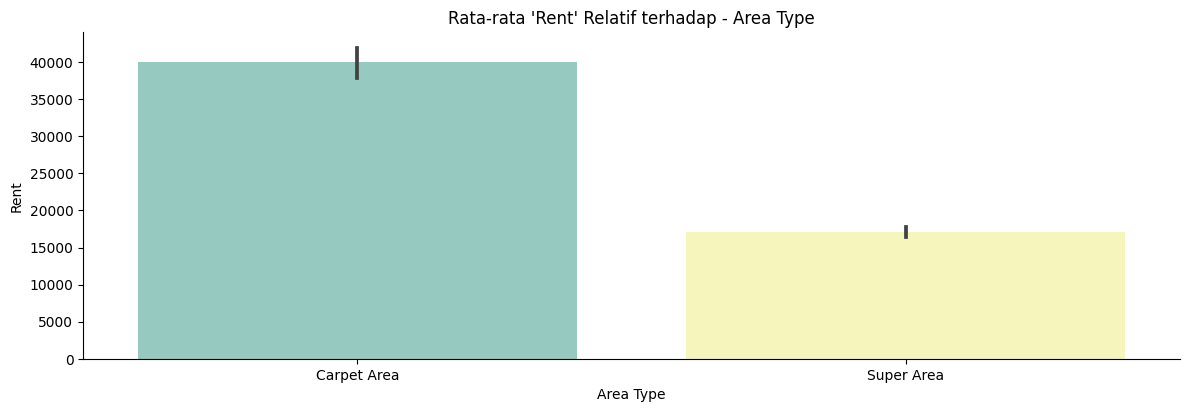

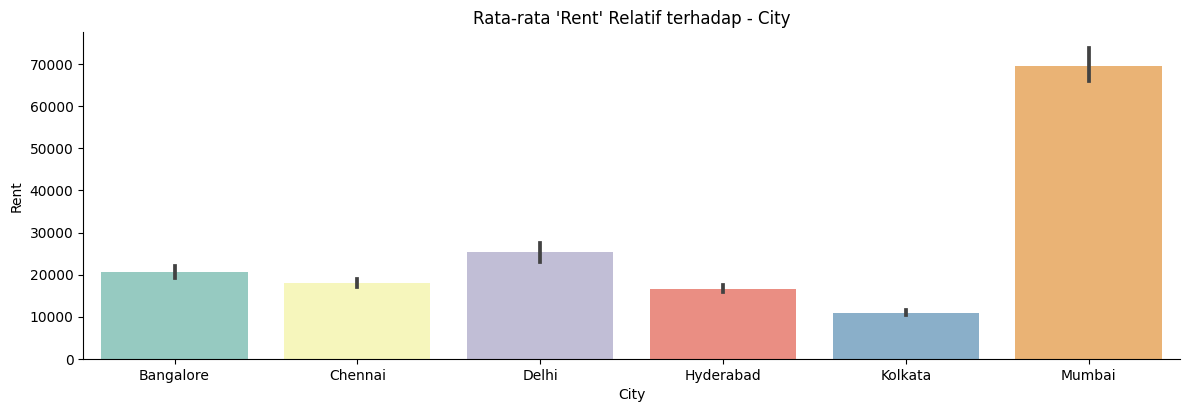

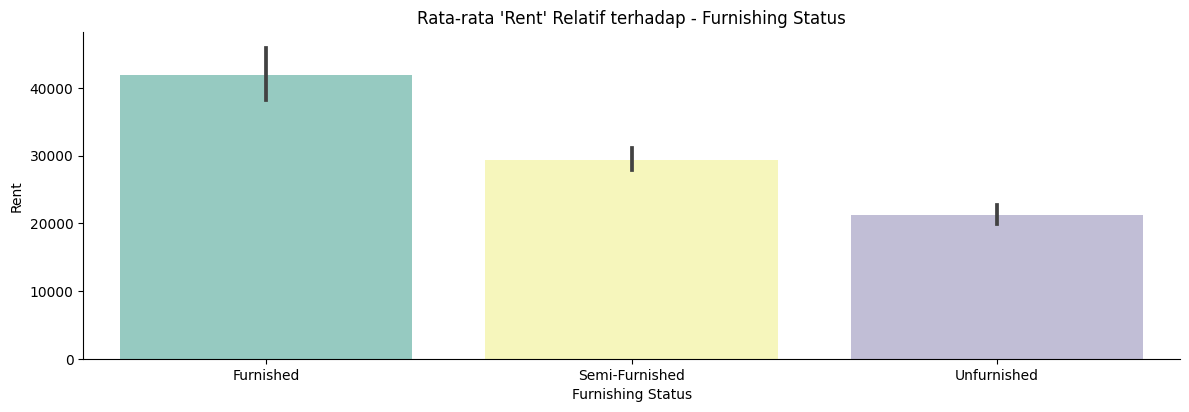

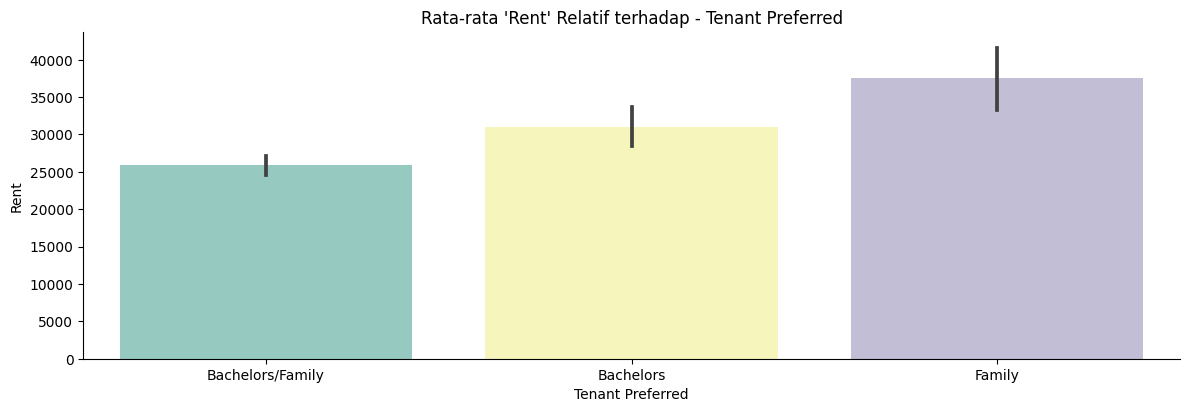

In [35]:
# Melihat kolerasi antara fitur kategorik dengan fitur target (harga)
cat_features = df2_rent.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Rent", kind="bar", dodge=False, height = 4, aspect = 3,  data=df2_rent, palette="Set3")
  plt.title("Rata-rata 'Rent' Relatif terhadap - {}".format(col))

## **Data Preparation**

### **One Hot Encoding untuk Fitur Kategorikal**

In [46]:
# df3_rent = pd.get_dummies(data =  df3_rent, columns = ['Area Type'])
# df3_rent = pd.get_dummies(data =  df3_rent, columns = ['City'])
# df3_rent = pd.get_dummies(data =  df3_rent, columns = ['Furnishing Status'])
df3_rent = pd.get_dummies(data =  df3_rent, columns = ['Tenant Preferred'])

df3_rent.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,70000,3354,3,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,2,10500,800,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0
2,2,13000,1000,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0
3,2,17000,1040,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,3,21000,1403,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0


## **Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split

X = df3_rent.drop(["Rent"],axis =1)
y = df3_rent["Rent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [48]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3696
Total # of sample in train dataset: 3326
Total # of sample in test dataset: 370


## **Normalisasi Data Numerik**

In [49]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data train
numerical_features = ['BHK', 'Size', 'Bathroom']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,BHK,Size,Bathroom
3012,1.187099,0.172205,1.271219
204,-0.070319,0.813892,0.054157
457,-1.327737,-0.927830,-1.162906
2876,-0.070319,-0.561152,-1.162906
2494,1.187099,1.638918,1.271219


In [50]:
# Normalisasi data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## **Modelling**

### **Grid Search**

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

,model,best_score,best_params
0,knn,0.450957,{'n_neighbors': 3}
1,boosting,0.840539,"{'learning_rate': 0.001, 'n_estimators': 25, '..."
2,random_forest,0.883751,"{'max_depth': 8, 'n_estimators': 25, 'random_s..."


## **Model with best parameter**

In [53]:
acc = pd.DataFrame(index=['accuracy'])

In [54]:
from sklearn.metrics import mean_squared_error

### **K-NN**

In [65]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
acc.loc['accuracy', 'knn'] = knn.score(X_test,y_test)
knn.score(X_test,y_test)

0.8255273511113942

### **Random Forest**

In [66]:
rf = RandomForestRegressor(n_estimators = 25, max_depth = 8, random_state = 77)
rf.fit(X_train, y_train)
acc.loc['accuracy', 'rf'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.9334445801093909

### **Adaboost**

In [67]:
boosting = AdaBoostRegressor(n_estimators = 25, learning_rate = 0.001, random_state = 33)
boosting.fit(X_train, y_train)
acc.loc['accuracy', 'boosting'] = boosting.score(X_test,y_test)
boosting.score(X_test,y_test)

0.9023275253496227

## **Evaluation**

In [68]:
acc

,knn,rf,boosting
accuracy,0.825527,0.933445,0.902328


In [69]:
# Mean squared error dari model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,121943.762405,316321.568153
RF,65218.009443,120665.989329
Boosting,167478.97222,177081.683253


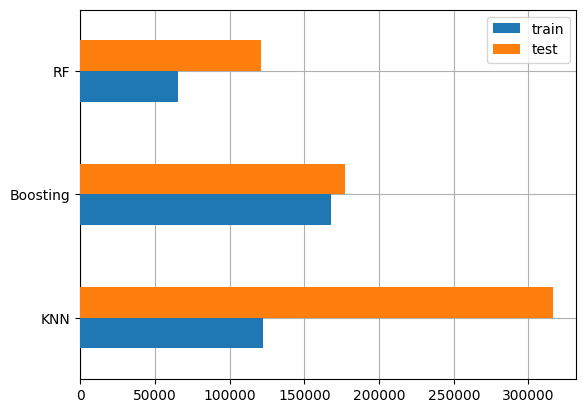

In [70]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [71]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1733,11000,11333.3,10694.3,11677.2
1442,13000,11500.0,13947.5,11677.2
1911,18000,23000.0,22331.9,12683.7
2003,22000,21333.3,18128.0,19714.1
553,11000,13166.7,11528.7,11677.2
